## “Diwali Sales Insights: Consumer Behavior & Trend Analysis using Python”

## Problem Statement

For e-commerce platforms, identifying the right customer segments and tailoring marketing strategies accordingly is crucial. However, many businesses face challenges in understanding who their core customers are, what demographics drive sales, and which regions or professions have the highest purchasing power. This project analyzes customer behavior based on gender, age group, location, occupation, marital status, and product preferences to uncover meaningful patterns.

## Objective

To understand customer behavior and demographic patterns.

To identify customer segments with higher purchasing power.

To develop targeted marketing and inventory strategies based on regional and product category performance.

To support business decisions through data-driven insights.

In [ ]:
#how to impoet library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                               

## Data Description

The data for this project has been sourced from a public dataset available online.

In [48]:
#how to import data
df = pd.read_csv(r'd:\diwali sales data.csv', encoding='cp1252')

In [ ]:
#how to check data size
df.shape

(11251, 15)

In [ ]:
#how to check top 5 row from data
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [ ]:
#how to check all columns of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
print("Gender Count:\n", df['Gender'].value_counts())
print("Age Distribution:\n", df['Age'].value_counts())
print("States with most orders:\n", df['State'].value_counts().head())
print("Top Product Categories:\n", df['Product_Category'].value_counts().head())
print("Marital Status:\n", df['Marital_Status'].value_counts())
print("Occupation:\n", df['Occupation'].value_counts())

Gender Count:
 Gender
F    7842
M    3409
Name: count, dtype: int64
Age Distribution:
 Age
30    522
26    494
28    460
29    454
31    448
     ... 
81      8
70      7
92      7
59      7
62      5
Name: count, Length: 81, dtype: int64
States with most orders:
 State
Uttar Pradesh     1946
Maharashtra       1526
Karnataka         1305
Delhi             1107
Madhya Pradesh     923
Name: count, dtype: int64
Top Product Categories:
 Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Name: count, dtype: int64
Marital Status:
 Marital_Status
0    6522
1    4729
Name: count, dtype: int64
Occupation:
 Occupation
IT Sector          1588
Healthcare         1408
Aviation           1310
Banking            1139
Govt                854
Hospitality         705
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food

## Data Cleaning

In [7]:
#drop unrelated/blank column
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [39]:
#how check null values
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#how to check null values with
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.shape

(11251, 13)

In [42]:
#how to remove null value
df.dropna(inplace=True)

In [13]:
df.shape

(11239, 13)

In [ ]:
#how to change data type
df['Amount']=df['Amount'].astype('int')

In [45]:
#how to check data types
df['Amount'].dtypes

dtype('int32')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

Barplot for the Gender

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

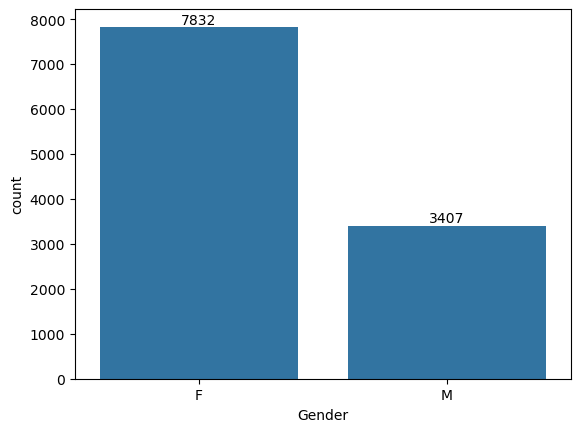

In [18]:
ax=sns.countplot(x='Gender',data=df)
for bar in ax.containers:
    ax.bar_label(bar)

In [19]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

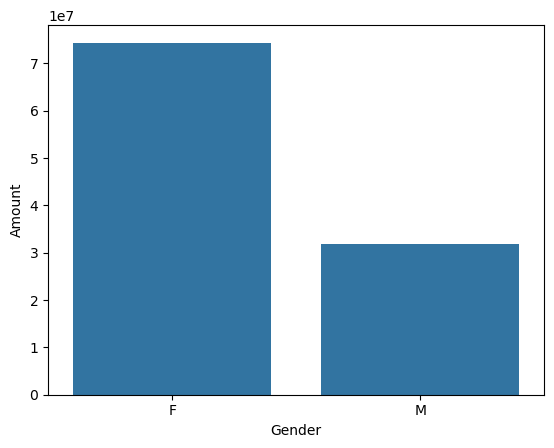

In [20]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

from above graphs we can see thst most of the buyers are females and even the purchasing power of females are grater than men

Barplot for the Age

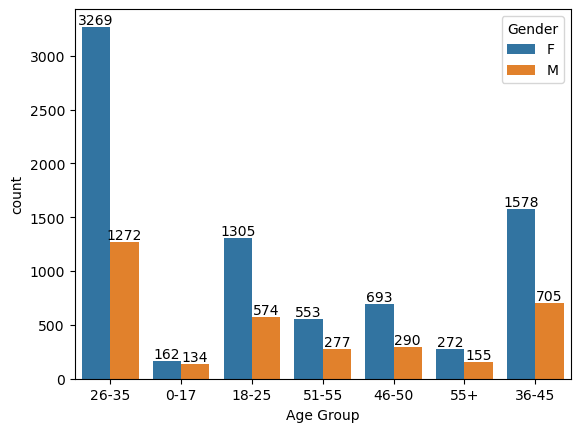

In [21]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

In [22]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

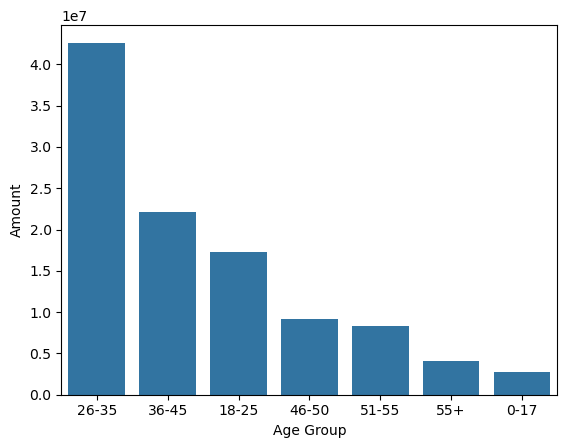

In [23]:
#total Amount vs Agre Group
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

from abov graphs we can see that most of the buyers are of age group between 26-35 years female

Barplot for the State

<Axes: xlabel='State', ylabel='Amount'>

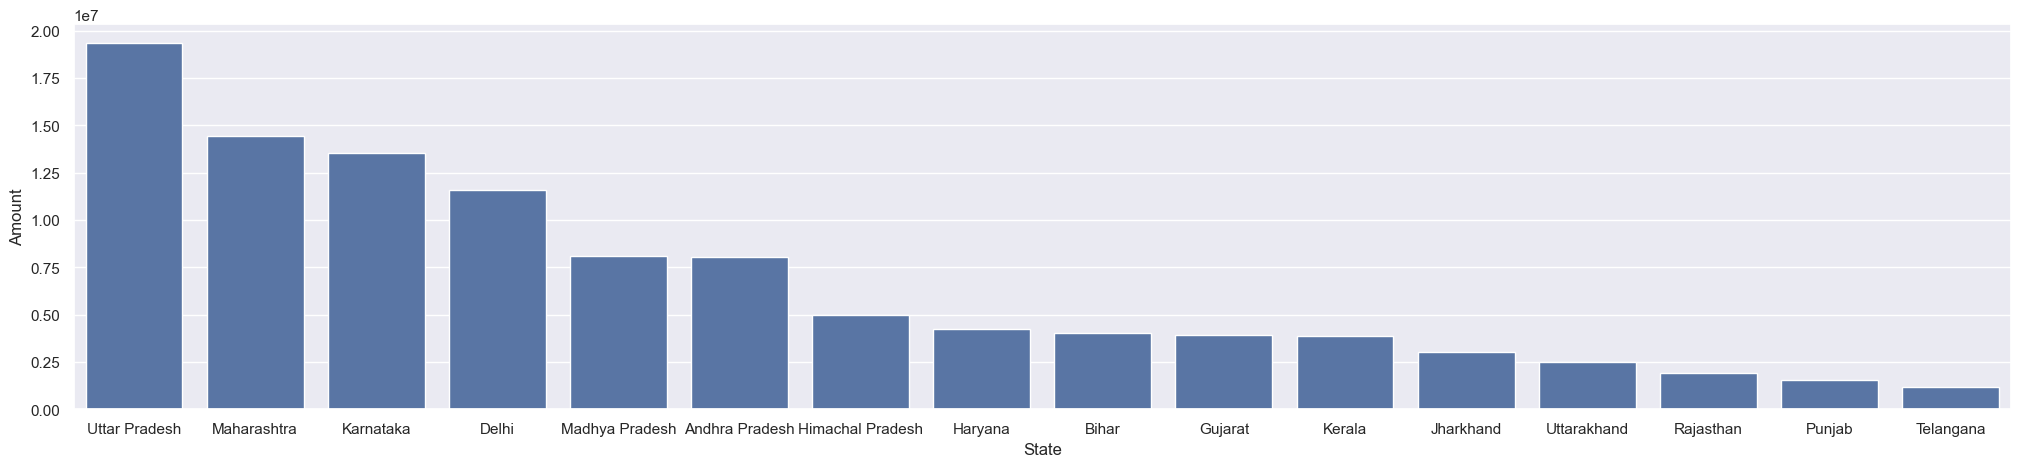

In [24]:
#total amount/sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

<Axes: xlabel='State', ylabel='Orders'>

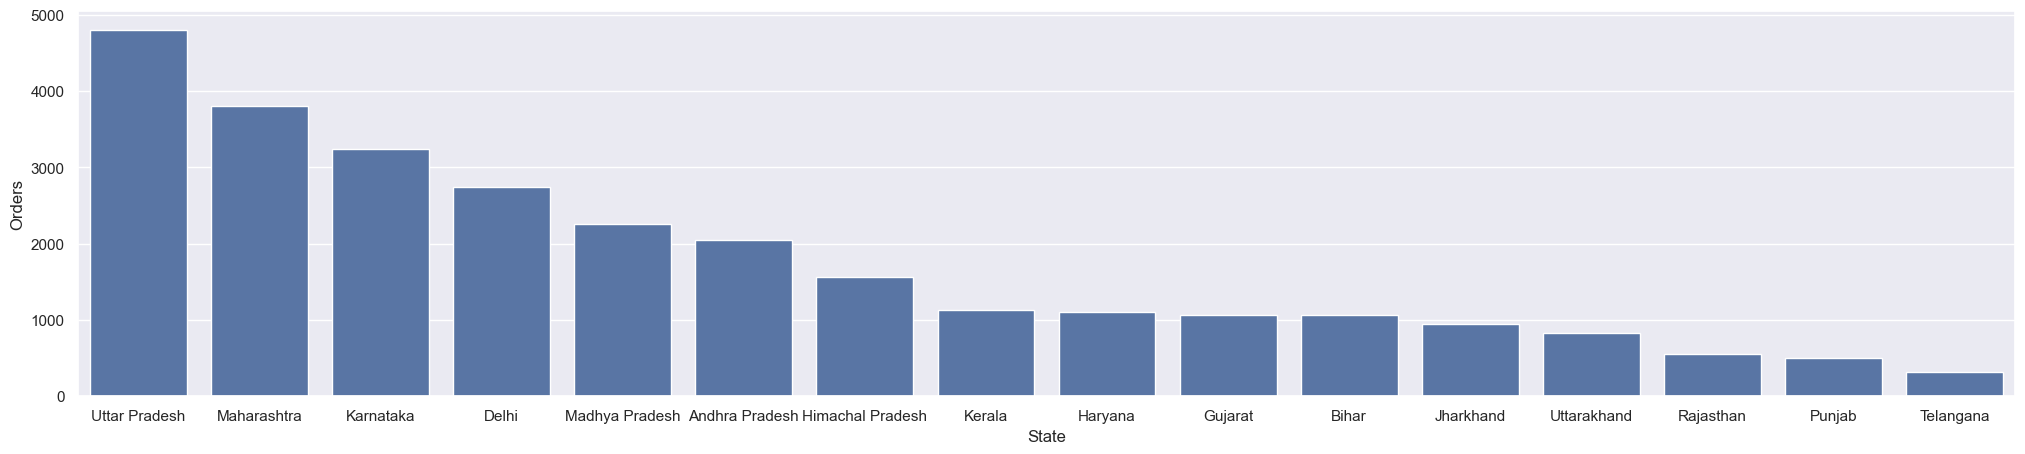

In [25]:
#total number of orders from top 10 state
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

From the above graphs, we can see that, unexpectedly, most of the orders come from Uttar Pradesh, Maharashtra, and Karnataka respectively. However, in terms of total sales amount, Uttar Pradesh ranks first, followed by Karnataka and then Maharashtra.

Barplot for the Marital Status

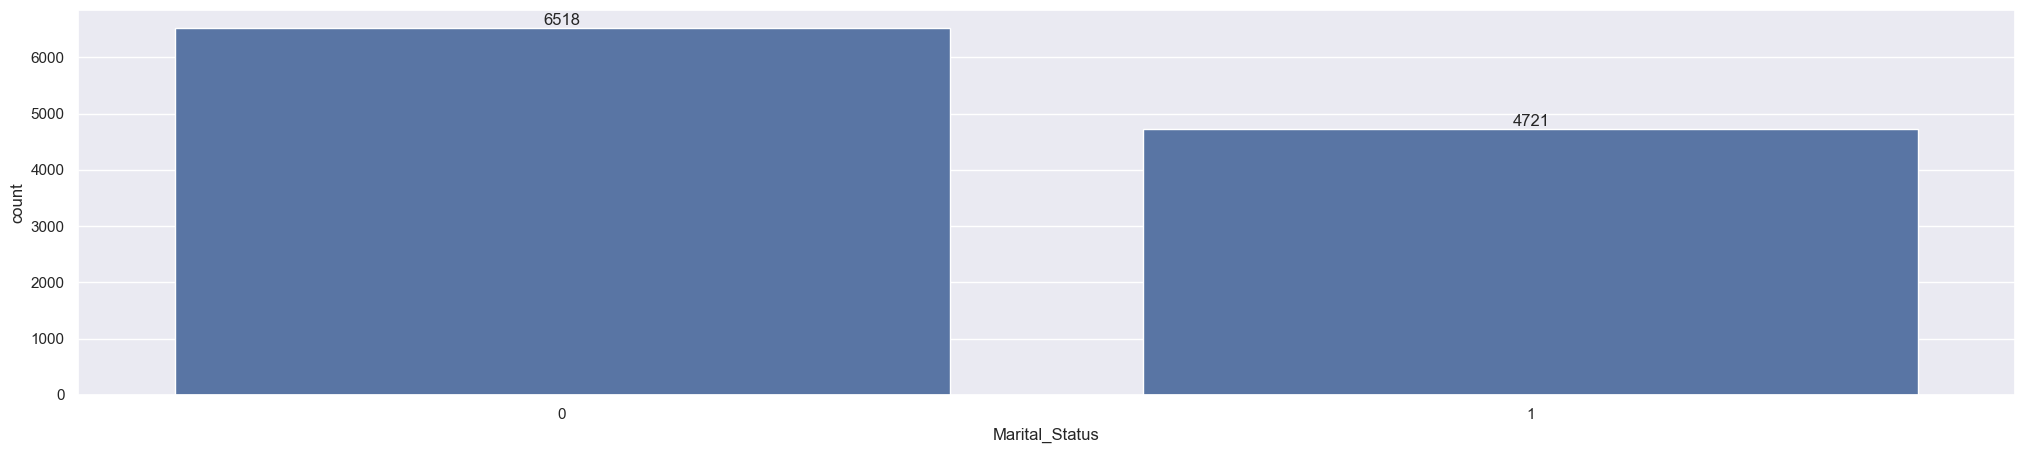

In [26]:
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(7,5)})
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

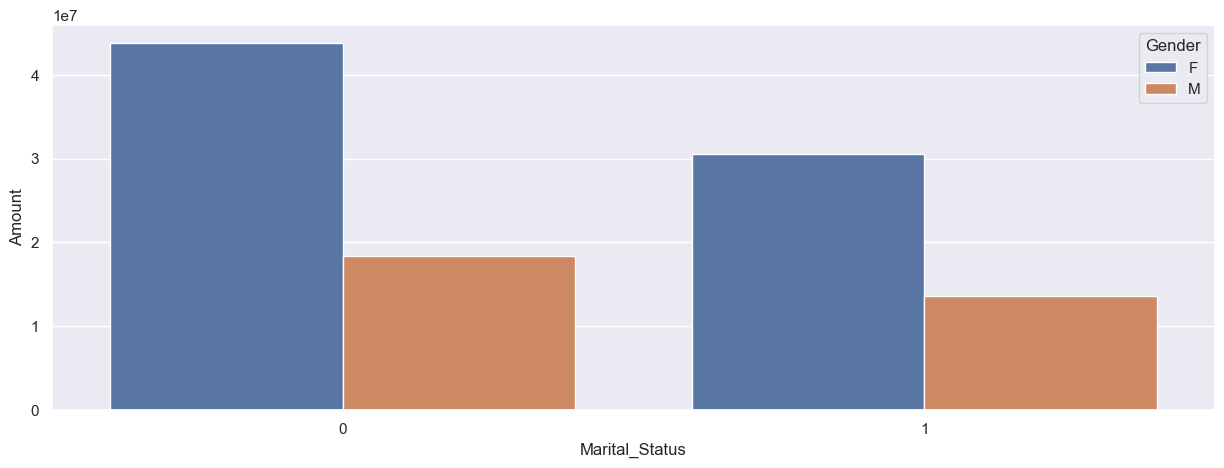

In [27]:
sales_mr=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_mr,hue='Gender')

from the above graph we can see that most of the buyers are married(women) and they have high purchasing power

Barplot for the Occupation

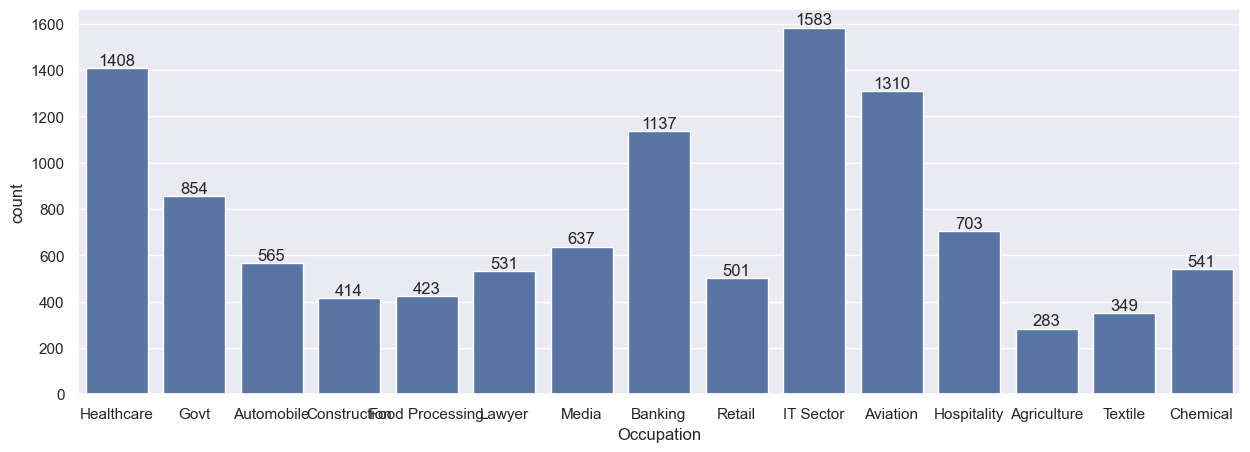

In [28]:
ax=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(7,5)})
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

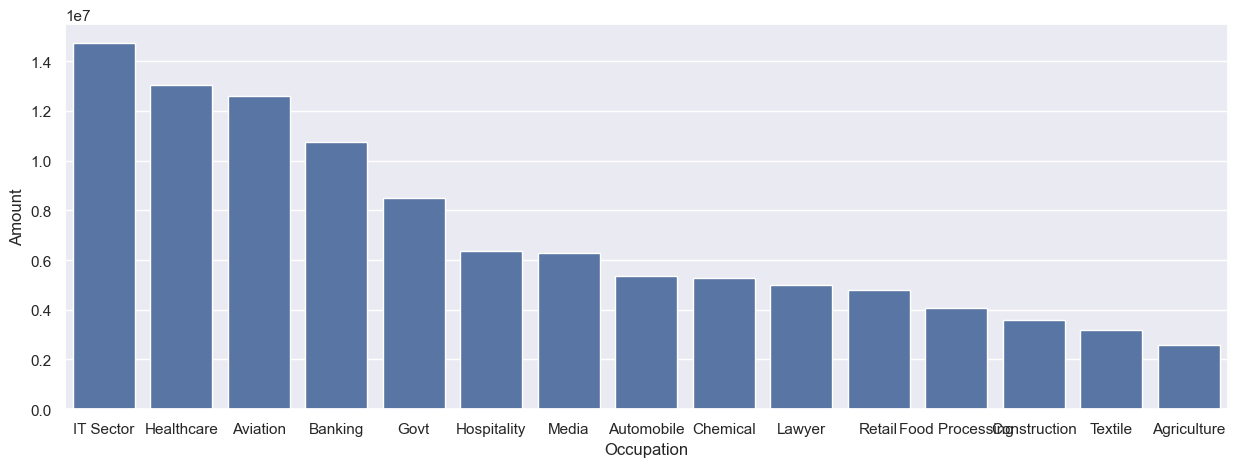

In [29]:
sales_oc=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_oc)

from above graph we can see that most of buyers are working in IT and Healthcare sector

Barplot for the Product Category

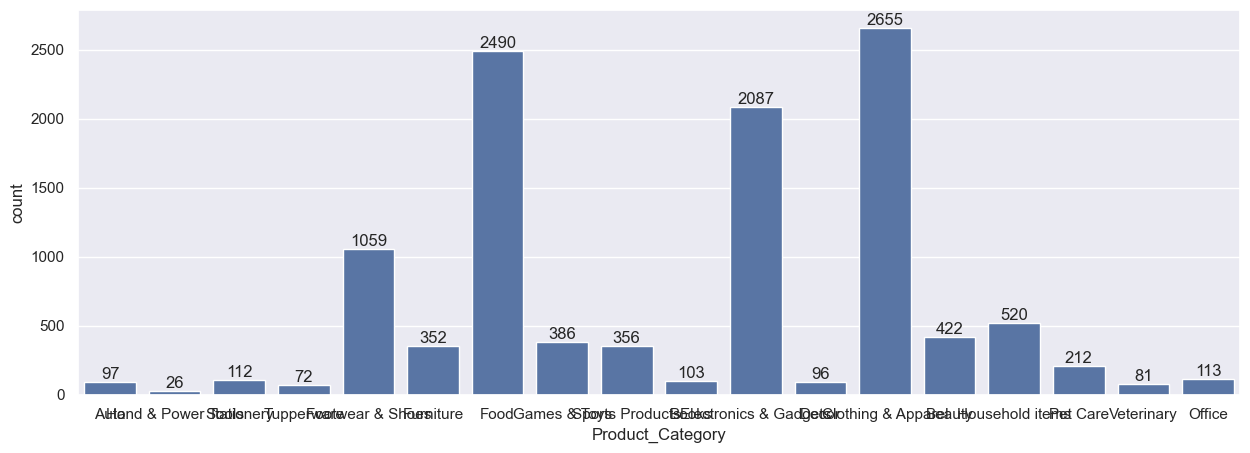

In [30]:
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(25,12)})
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

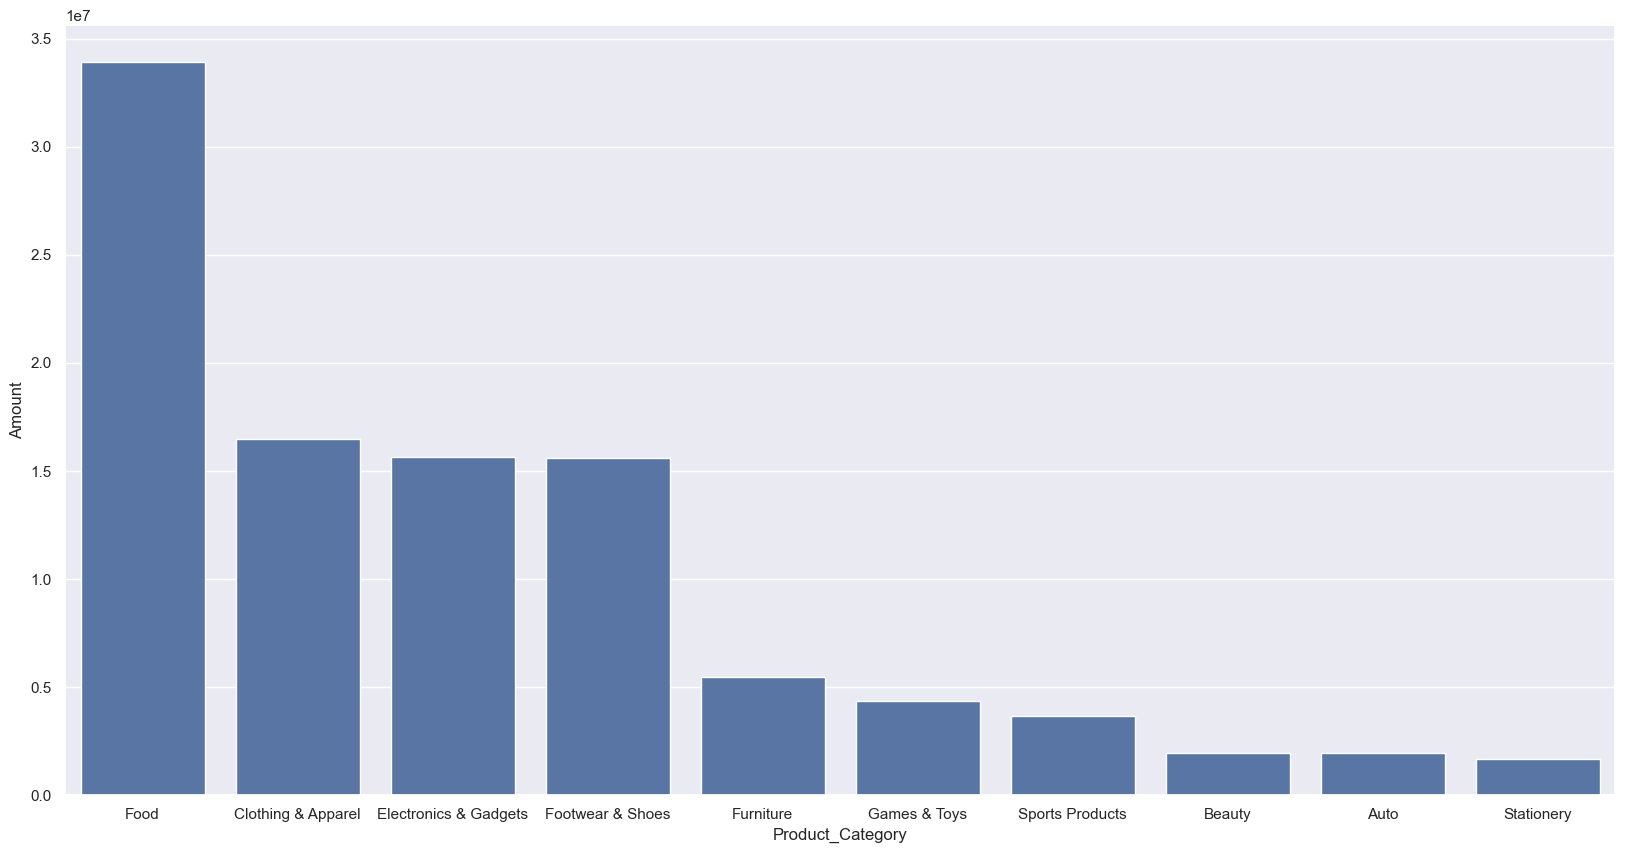

In [31]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='Product_Category',y='Amount',data=sales_pc)

From the above graphs, we can see that a significant amount of money has been spent in Food, Clothing and Electronics

<Axes: xlabel='Product_Category', ylabel='Orders'>

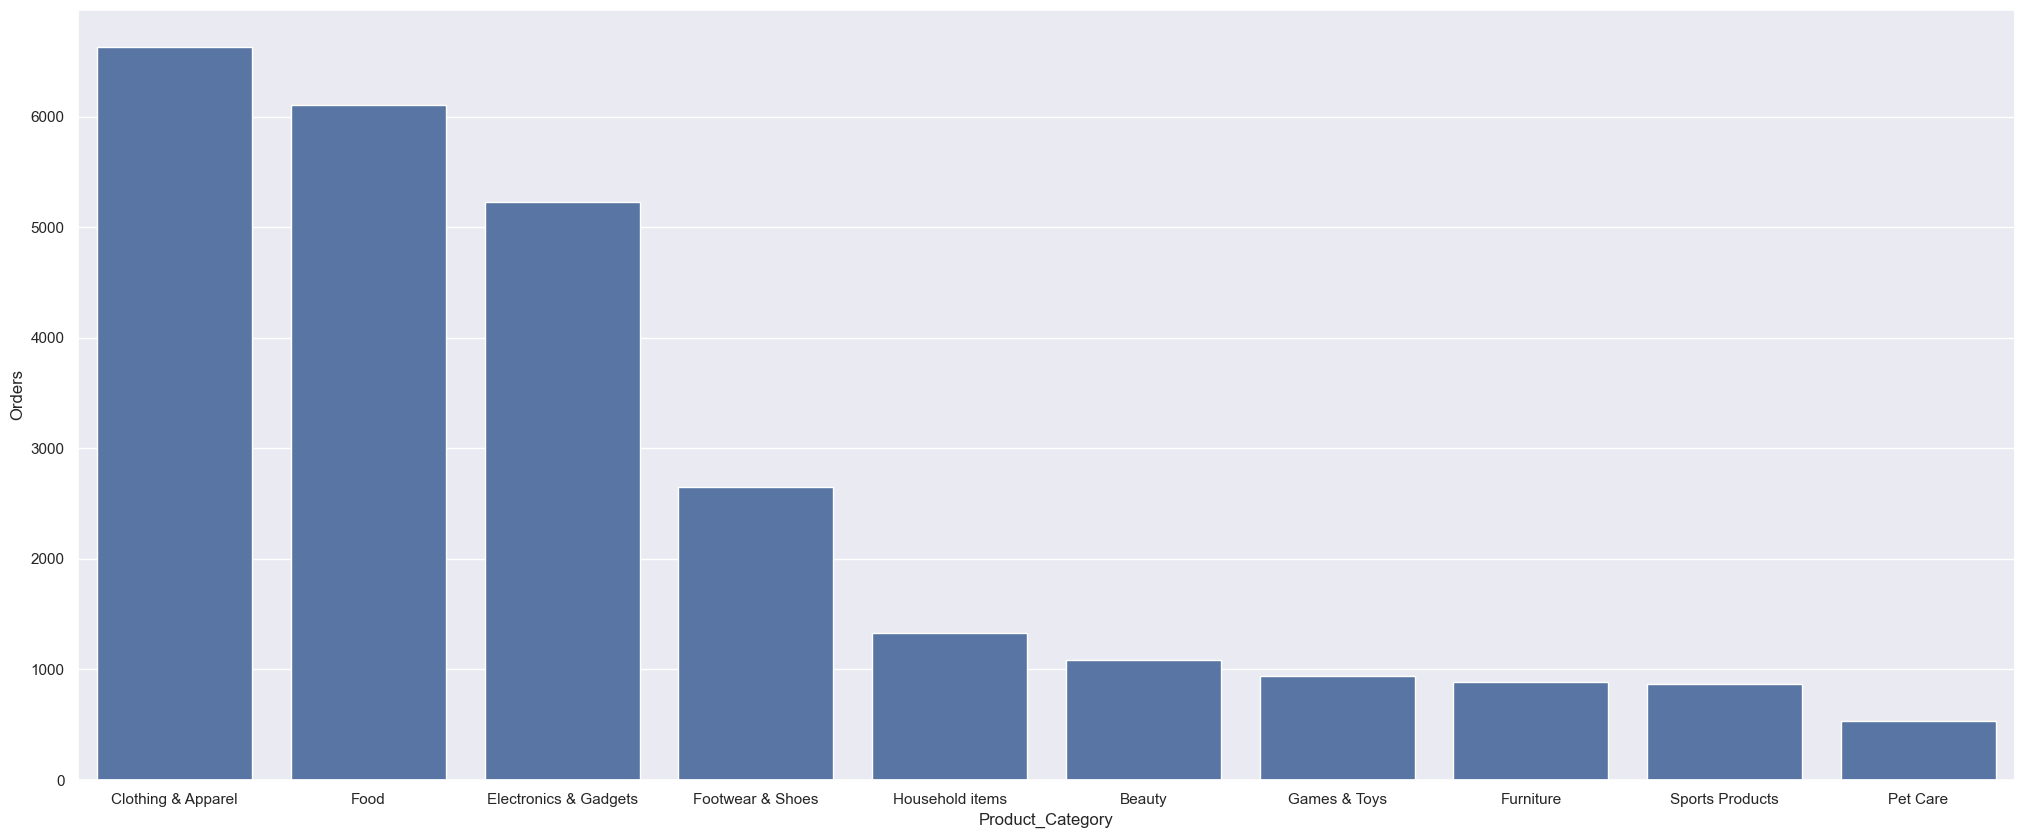

In [32]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='Product_Category',y='Orders',data=sales_pc)

from above graph we can see that most of the sold products are from Clothing,Food and Electronics category

Top 10 most sold products

<Axes: xlabel='Product_ID', ylabel='Orders'>

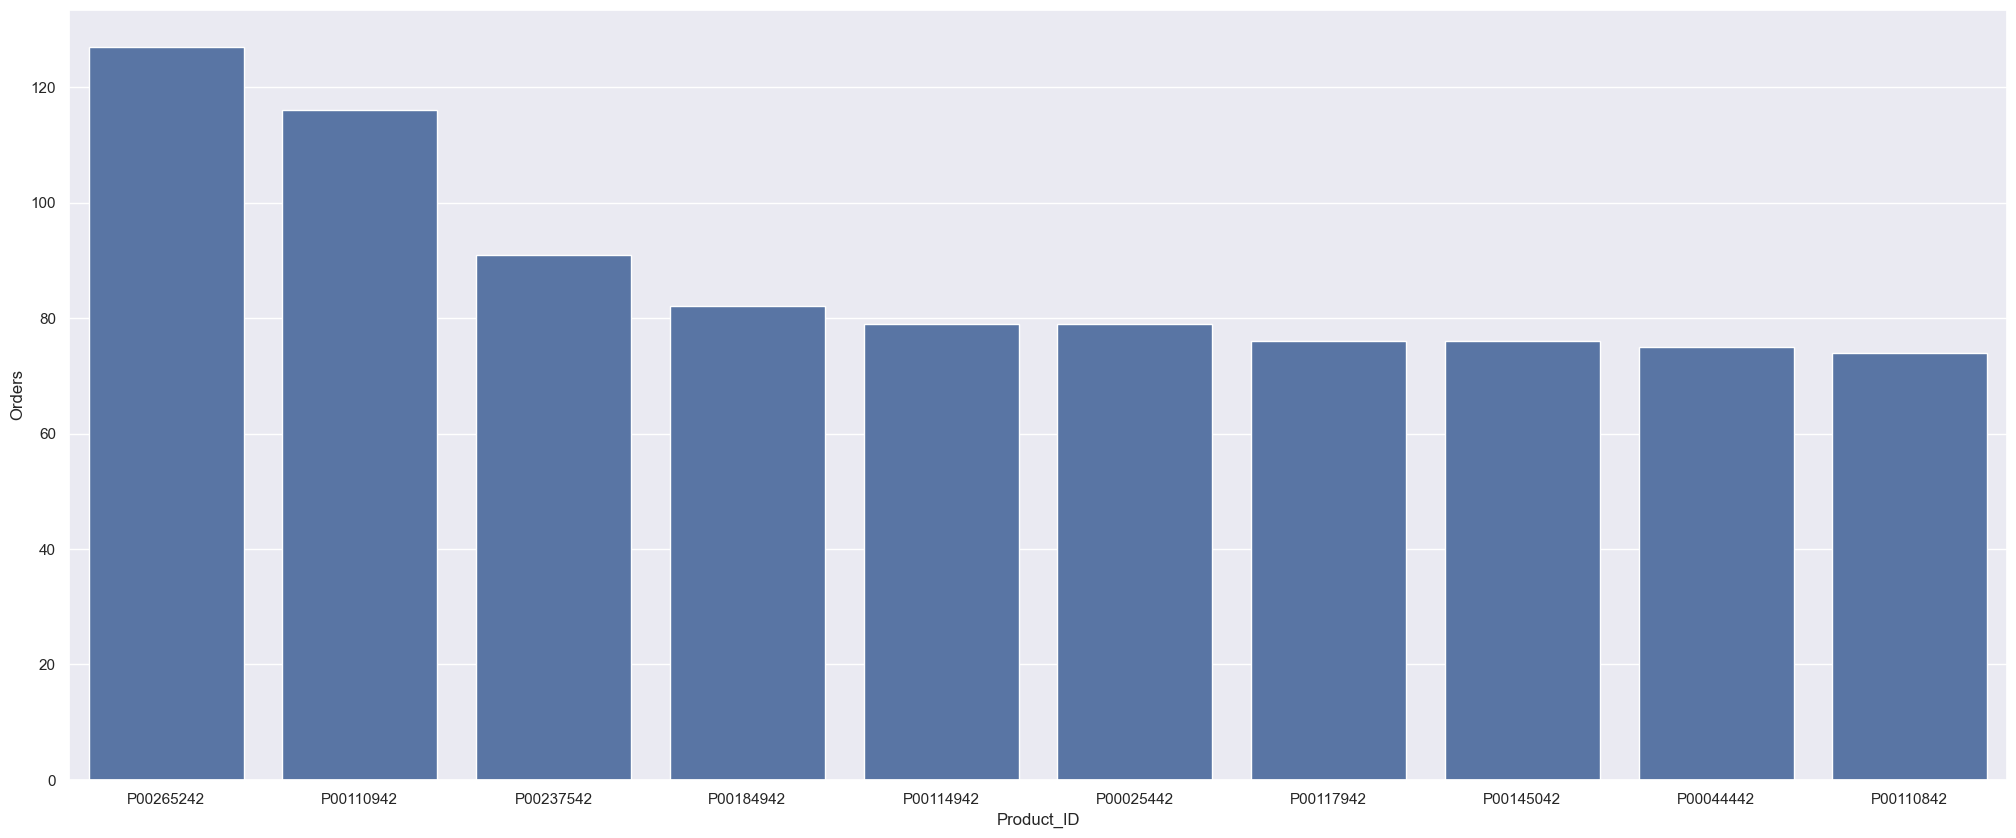

In [33]:
sales_pi=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='Product_ID',y='Orders',data=sales_pi)

## Conclusion

Based on the above insights, the following strategic actions are recommended to improve business performance:

– Run targeted ads for working women aged 26–35 years

– Offer festive or combo deals on high-selling categories like Clothing, Food, and Electronics

– Focus inventory and logistics planning in states like Uttar Pradesh, Karnataka, and Maharashtra

– Collaborate with IT & Healthcare companies for exclusive discount programs
